In [40]:
!pip install easyocr
!pip install imutils

You should consider upgrading via the 'c:\users\sheza\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\sheza\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [41]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

# 1. Read in image, grayscale and blur 

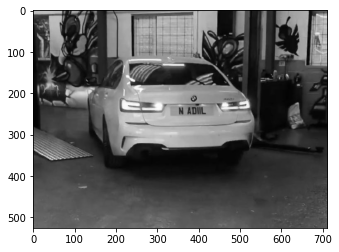

In [43]:
img = cv2.imread('Adil.jpeg') # load in image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # converted image from color to grayscale
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)) # show/plot image

# 2. Apply filter and find edge detection

Filltering will alow us to remove noise from our image 
Edge detection will allow us to detect edges within our image

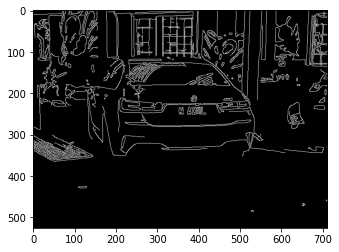

In [44]:
bfilter = cv2.bilateralFilter(gray, 11, 11, 17) # Noise reduction
edged = cv2.Canny(bfilter, 30, 200) # Edge detection

plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

# 3. Find contours and apply mask

Contours is all about finding certain shapes in the image
In this case it will be a rectangle, this being the shape of the numberplate
We want a countour of 4 points, because our contour should be a rectangle

In [45]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # This goes throught the image and finds the contours
contours = imutils.grab_contours(keypoints) # This goes and grabs our contours
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] # Sorts the top 10 contours by area

Now we want to loop through all the contours and see if they actually represent a rectangle (numberplate) - to do this, we check if there are 4 key point in the contour, if there is not we know it is not a rectangle(numberplate).

In [64]:
location = None
for contour in contours: 
    approx = cv2.approxPolyDP(contour, 10, True) # This method allows us to approximate the polygon of our contours - the 10 represents how fine our approximation is
                                                 # This means if it is roughly a rectangle, it will classify it as one
    if len(approx) == 4:  # If the approximation has 4 keypoints - we will assume it is our numbeplate and end the loop
        location = approx
        break
    
print(location)   

None


Now we will mask out our image and leave the numberplate, this will only show the numberplate

In [62]:
#location = contours[9] #This is to check what the other contours were i.e. light, grills etc..

mask = np.zeros(gray.shape, np.uint8) # This creates a blank mask - same shape as the original image
new_image = cv2.drawContours(mask, [location], 0,255, -1) # Drawn our contour out within the image
new_image = cv2.bitwise_and(img, img, mask=mask) # Then we have layed the mask on top of the original image

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\drawing.cpp:2606: error: (-215:Assertion failed) reader.ptr != NULL in function 'cvDrawContours'


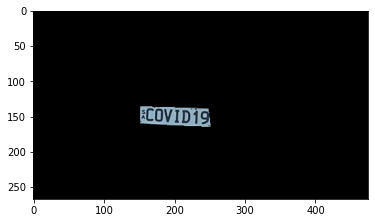

In [29]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [33]:
(x, y) = np.where(mask==255) # Find every part where the image is not black, so basically coordinates of numberplate
(x1, y1) = (np.min(x), np.min(y)) # Grabs minimum x and y value - this gets point at top left corner
(x2, y2) = (np.max(x), np.max(y)) # Grabs maximum x and y value - this gets point at bottom right corner
cropped_image = gray[x1: x2+1, y1: y2+1] # Grabs the cropped image

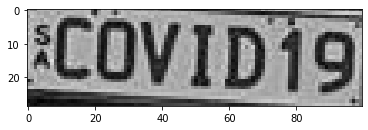

In [34]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# 4. Use easy OCR to read text

In [35]:
reader = easyocr.Reader(['en']) # Create model and select languagae of text
result = reader.readtext(cropped_image) # Use the reader on the cropped image

result # Output shows predicted text and confident level, respectively

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [100, 0], [100, 29], [0, 29]], ':COVID19', 0.4724047780036926)]

# Render result

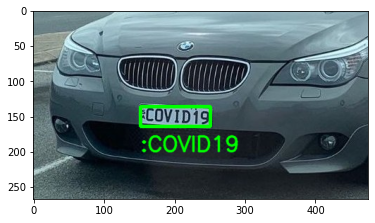

In [36]:
text = result[0][-2] # Grabbed specified text
font = cv2.FONT_HERSHEY_SIMPLEX # Specifid text font 
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3) # This and last line specifies location of text and rectangle on image 
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))